# Introduction

In The Goal by Eli Goldratt the main character (Alex) takes his son's scout troupe on a hiking expedition. He eventually will have an epiphany about how his manufacturing plant should work based on how the column of scouts behaves on the trail (the distance beween first and last scout constantly grows).

When they stop for lunch he has already begun to have insights and he plays a game with several scouts where each scout is in charge of a bowl and they have a die between them. The scouts take it in turn to roll the die. The number they roll is the number of matches they pass from their bowl to their neighbour's bowl in the 'production' line. If they have less matches than the number on the die they can only pass all of the matches that they have.

Alex's thinking first proposes that the average number of matches coming off the assembly line should be the average number of matches that a single bowl produces i.e. 3.5. To some readers this will already not feel right. Any roll less 4 will inhibit the downstream bowls from yielding more that 3.5 matches and so the number of matches moved will skew below 3. Indeed this is the conclusion that Goldratt (and Alex) makes in the book after the game is finished. Here we test that conclusion with some simulations.

In the first experiment below we simulate such a game as happened in the book.


## Helper Plot Function

In [11]:
import matplotlib.pyplot as plt
import math


def plot_function(f, rg, title="", xlabel="", ylabel="", of_x=True):
    fig, ax = plt.subplots()
    data = [(x, f(x) if of_x else f()) for x in rg]
    ax.plot(
        [x[0] for x in data], 
        [x[1] for x in data])
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

## Simulator for the Game

In [13]:
import math
import random
from statistics import mean


def match_game_1(simtimeunits=40):
    
    number_of_scouts = 6
    
    # start the bowls with 0 matches
    bowls = [0] * number_of_scouts
    
    # first scout has infinte matches to move i.e. infinite materials in inventory
    bowls[0] = math.inf
    
    total_produced = []
    ave_rolls = []
    ave_moved = []
    
    for i in range(simtimeunits):
        rolls = []
        moved = []
        for i in range(number_of_scouts-1):
            roll = random.randint(1,6)
            rolls.append(roll)
            matches_to_move = min(bowls[i], roll)
            moved.append(matches_to_move)
            bowls[i+1] += matches_to_move
            bowls[i] -= matches_to_move
        roll = random.randint(1,6)
        rolls.append(roll)
        matches_produced = min(bowls[-1], roll)
        moved.append(matches_produced)
        total_produced.append(matches_produced)
        bowls[-1] -= matches_produced
        ave_rolls.append(mean(rolls))
        ave_moved.append(mean(moved))
    return total_produced, ave_rolls, ave_moved
    
def average_output_after_simtimeunits(i):
    return sum([sum(match_game_1(i)[0]) for j in range(200)])/200

           

Lets start simply. After 10 simulation cycles what kind of throughput do we get?

In [16]:
print("example throughput=", sum(match_game_1(10)[0]))

example throughput= 20


Lets run a bunch of those simulations and see what we get on average. We do 50 experiments.

In [17]:
a = [sum(match_game_1(10)[0]) for x in range(50)]
print(a)
print('average=', mean(a))

[26, 24, 24, 18, 19, 19, 22, 21, 25, 24, 18, 28, 25, 23, 28, 23, 23, 24, 19, 18, 19, 22, 19, 16, 16, 25, 16, 16, 20, 19, 22, 24, 19, 16, 28, 14, 19, 25, 18, 21, 23, 22, 21, 22, 24, 28, 24, 26, 21, 28]
average= 21.68


In 10 cycles and an average production of 3.5 we would expect a throughput of 35. OK, so it looks like our system of production is way below that 'target' number.

What about if we run the simulation for 20 cycles?

In [18]:
a = [sum(match_game_1(20)[0]) for x in range(50)]
print(a)
print('average=', mean(a))

[56, 57, 47, 57, 54, 46, 50, 51, 56, 51, 51, 46, 50, 55, 39, 53, 51, 44, 50, 51, 37, 47, 52, 52, 46, 49, 45, 58, 51, 38, 47, 55, 54, 45, 50, 44, 48, 50, 44, 49, 46, 44, 56, 52, 46, 49, 51, 55, 58, 45]
average= 49.56


Hmmm. In 20 cycles we would expect 70.

And 100?

In [19]:
a = [sum(match_game_1(100)[0]) for x in range(50)]
print(a)
print('average=', mean(a))

[293, 292, 314, 304, 284, 288, 289, 301, 290, 304, 281, 302, 284, 303, 293, 294, 301, 306, 298, 278, 308, 283, 295, 292, 306, 292, 301, 289, 322, 291, 290, 288, 310, 301, 298, 294, 309, 286, 309, 309, 293, 295, 299, 304, 300, 308, 275, 291, 294, 301]
average= 296.64


Its easier if we graph the throughput as a function of time. We will do experiments for a range of simulation times from 10 to 200.

[21.68, 48.9, 76.9, 109.14, 138.8, 170.14, 204.64, 233.46, 263.02, 297.06, 330.66, 358.06, 389.32, 421.1, 459.54, 489.92, 526.14, 554.64, 586.78]


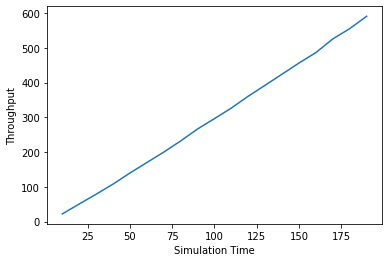

In [20]:
def average_total_throughput(i):
    # i is the simulation time
    return mean([sum(match_game_1(i)[0]) for x in range(50)])

print([average_total_throughput(i) for i in range(10,200,10)])
plot_function(average_total_throughput, range(10,200,10), xlabel="Simulation Time", ylabel="Throughput")

We find that the total throughput is linear with time. That is what we would expect. So can we conclude that Alex was completely correct?

Well lets dig a little deeper. We see that in 10 cycles we get a throughput of about 22. That's about 2.2 per cycle on average. 
* 10 -> 22/10 = 2.2
* 20 -> 50/20 = 2.5
* 30 -> 80/30 = 2.666

Could it be that the average throughput per cycle is going up? Lets graph average throughput per cycle.

In [ ]:
def average_average_throughput_per_time(i):
    # i is the simulation time
    return mean([ mean(match_game_1(i)[0]) for x in range(50)])


# print([average_average_throughput_per_time(i) for i in range(10,1000,10)])
plot_function(average_average_throughput_per_time, range(10,1000,10), xlabel="Simulation Time", ylabel="Thoughput per Cycle")

That's very interesting. We can see that at the beginning the Throughput per time unit is terrible. However as we run the simulation longer it improves such that after 1000 cycles it is at 3.32 - not too far off 3.5.

Lets run one big experiment on 100,000 cycles and see what the average throughput is.

In [11]:
mean(match_game_1(100000)[0])

3.48385

Wow! Almost 3.5. In this case Goldratt was only partly right. He says that dependent events and statistical fluctuations will mean that the throughput will never be the average of the dice rolls. He is correct in saying that much. However, over a long period of time the throughput will approach that average. 

What the book suggests is that the throughput through each bowl in each turn is limited by the minimum dice roll in that turn - with 6 bowls you might think that approaches 1 and so the throughput should approach 1. It may be correct to say that it is a limiting factor but the implication goes too far. The throughput will never ever be more than that average number. However, bowls can accumulate matches from turns with bad rolls in which case a roll by a preceeding scout on any given turn may not have the devastating effect you might expect. One way to get a feel for this is to measure the average number of matches per bowl after a turn which we will do next.

### On Intuition

If your intuition is simply that the throughput will be the average of the dice rolls you are wrong. It is not that simple. The throughput will never be more than the average so it doesn't average out (i.e. up vs down).

If your intuition is that the throughput will be subject to statistical fluctuations in dependent events you are right. But you also may be wrong in thinking that in this system over time the expected throughput per time unit will be the average.

If your intution told you that the throughput will start out terrible but approach the average - never ever being higher than the average dice roll .. you are smarter than me.

# How Many Matches Accumulate in Bowls

Bowls do not have infinite capacity - neither do warehouses or work stations storing inventory. We modify the simulator above to track the number of matches in the bowls. We accumulate it as a sum per bowl.

In [3]:
import math
import random
from statistics import mean


def match_game_2(simtimeunits=40):
    
    number_of_scouts = 6
    
    # start the bowls with 0 matches
    bowls = [0] * number_of_scouts
    
    # initialize the stats we are collecting
    total_match_stats_per_bowl = [0] * number_of_scouts
    
    # first scout has infinte matches to move i.e. infinite materials in inventory
    bowls[0] = math.inf
    
    for i in range(simtimeunits):
        rolls = []
        moved = []
        for i in range(number_of_scouts-1):
            roll = random.randint(1,6)
            matches_to_move = min(bowls[i], roll)
            bowls[i+1] += matches_to_move
            bowls[i] -= matches_to_move
        roll = random.randint(1,6)
        matches_produced = min(bowls[-1], roll)
        bowls[-1] -= matches_produced
        
        total_match_stats_per_bowl = [x+y for x,y in zip(total_match_stats_per_bowl, bowls)]
    return total_match_stats_per_bowl



First lets look at some raw numbers. Here are the number of matches in a bowl on average during the course of a 1000 time unit simulation. Each line is a different simulation (remember we consider the first bowl as having infinite matches).

In [37]:
for i in range(10):
    print([x/1000 for x in match_game_2(1000)])

[inf, 25.374, 40.027, 34.066, 10.839, 15.274]
[inf, 23.279, 16.884, 11.618, 9.389, 10.286]
[inf, 37.168, 11.911, 11.261, 9.442, 14.168]
[inf, 23.552, 24.681, 13.726, 31.761, 29.166]
[inf, 31.804, 13.233, 12.29, 32.036, 13.241]
[inf, 31.028, 33.908, 23.875, 13.817, 15.634]
[inf, 25.352, 27.301, 15.711, 19.146, 42.492]
[inf, 29.745, 15.566, 7.547, 20.652, 19.141]
[inf, 41.537, 41.611, 13.513, 8.674, 14.498]
[inf, 53.881, 24.201, 35.794, 20.694, 17.985]


It is clear that the number of matches in a bowl is far greater than the 'target' average throughput of 3.5 - it is even greater than the maximum throughput of each bowl. This means that the number of matchsticks that a bowl is receiving is not the limiting factor. That is why the average throughput can approach 3.5 over time once the system starts compensating for the terrible start it had. The logic behind this is that a bowl is bounded on the low side by zero but not on the up side. Therefore by the balance of probabilities the dies will fall such that every bowl will acquire a net gain of matchsticks at some point and that net gain can only be eroded by the difference between the matches it receives and delivers to its neighbour and that is bounded at any point by 5 and is on average 0.

In manufacturing language inventory is piling up at each station/machine but the throughput is limited by the average throughput. The problem here is operational cost, not throughput and how to decrease the cost without further reducing throughput.

To explore a bit further we can look at the average of the number of matches in each bowl during the simulation. We graph the growth of the average number of matches in each bowl during the simulation (remember that the first bowl has infinite matches). We can see that the early bowls have a much bigger backlog than the later bowls.

In [7]:
def get_average_number_matches_per_bowl_during_sim(i):
    a = []
    number_of_trials = 100
    for _ in range(number_of_trials):
        a.append([x/i for x in match_game_2(i)])
    return [mean(x) for x in list(zip(*a))]

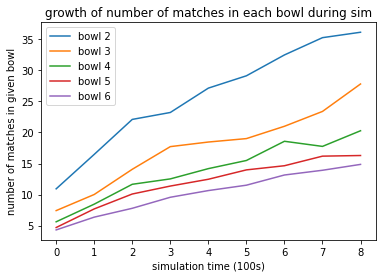

In [9]:
from matplotlib import pyplot as plt


a = []

for simlength in range(100,1000,100):
    a.append(get_average_number_matches_per_bowl_during_sim(simlength))

bowls = list(zip(*a))

# add each bowl to graph
fig, ax = plt.subplots()
for bowl in bowls[1:]: # skip the infinite bowl
    ax.plot(bowl)
ax.set_title('growth of number of matches in each bowl during sim')
ax.set_xlabel('simulation time (100s)')
ax.set_ylabel('number of matches in given bowl')
ax.legend(['bowl %s'%i for i in range(2, len(bowls)+1)])
plt.show()


Of course the backlog of matchsticks is growing in the first bowls quicker than at the last bowls.

# What if you can roll 0?

Finally it is ineresting to answer a question that Alex couldn't answer on the hike because he only had a six sided die. What if a scout could also roll a zero? How does that effect throughput?

After all, in manufacturing a works station can completely break down. 

The simulation below shows that adding this possibility does not fundamentally change the behviour of the system.

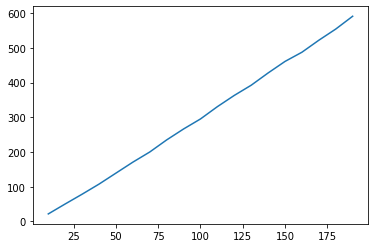

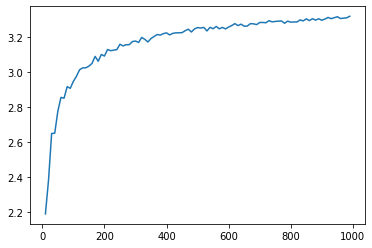

In [14]:
def match_game_3(simtimeunits=40):
    
    number_of_scouts = 6
    
    # start the bowls with 0 matches
    bowls = [0] * number_of_scouts
    
    # first scout has infinte matches to move i.e. infinite materials in inventory
    bowls[0] = math.inf
    
    total_produced = []
    
    ave_rolls = []
    ave_moved = []
    for i in range(simtimeunits):
        rolls = []
        moved = []
        for i in range(number_of_scouts-1):
            roll = random.randint(0,6)
            rolls.append(roll)
            matches_to_move = min(bowls[i], roll)
            moved.append(matches_to_move)
            bowls[i+1] += matches_to_move
            bowls[i] -= matches_to_move
        roll = random.randint(0,6)
        rolls.append(roll)
        matches_produced = min(bowls[-1], roll)
        moved.append(matches_produced)
        total_produced.append(matches_produced)
        bowls[-1] -= matches_produced
        ave_rolls.append(mean(rolls))
        ave_moved.append(mean(moved))
    return total_produced, ave_rolls, ave_moved

def average_total_throughput_3(i):
    # i is the simulation time
    return mean([sum(match_game_1(i)[0]) for x in range(50)])

plot_function(average_total_throughput_3, range(10,200,10))


def average_average_throughput_per_time_3(i):
    # i is the simulation time
    return mean([ mean(match_game_1(i)[0]) for x in range(50)])

plot_function(average_average_throughput_per_time_3, range(10,1000,10))

Funnily enough in the book one of the scouts declares to his peer who is dismayed by the initial lack of progress:

> Don't worry we'll catch up!

Given enough time they NEARLY would have, even if their die had a side with zero on it.